<a href="https://colab.research.google.com/github/johnkansas/dacon_start_tutorial_test/blob/main/Lv4_1_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-01-16 07:10:37--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-01-16 07:10:37--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 142.250.148.113, 142.250.148.101, 142.250.148.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.148.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utd1e3b0u7v26bkcaphpltujc6fcpgns/1642317000000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-01-16 07:10:38--  https://doc-10-10-docs.googleusercontent.com/docs/secur

In [2]:
# 라이브러리 및 데이터 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,PolynomialFeatures
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# VIF기능을 제공하는 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn 의 MinMaxScaler 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

# 데이터를 불러와 학습시킬 준비하기

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.drop('index',axis = 1, inplace = True)
test.drop('index',axis = 1, inplace = True)

train = pd.get_dummies(train)#각열에 대하여 one hot 인코딩 방법.
test = pd.get_dummies(test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


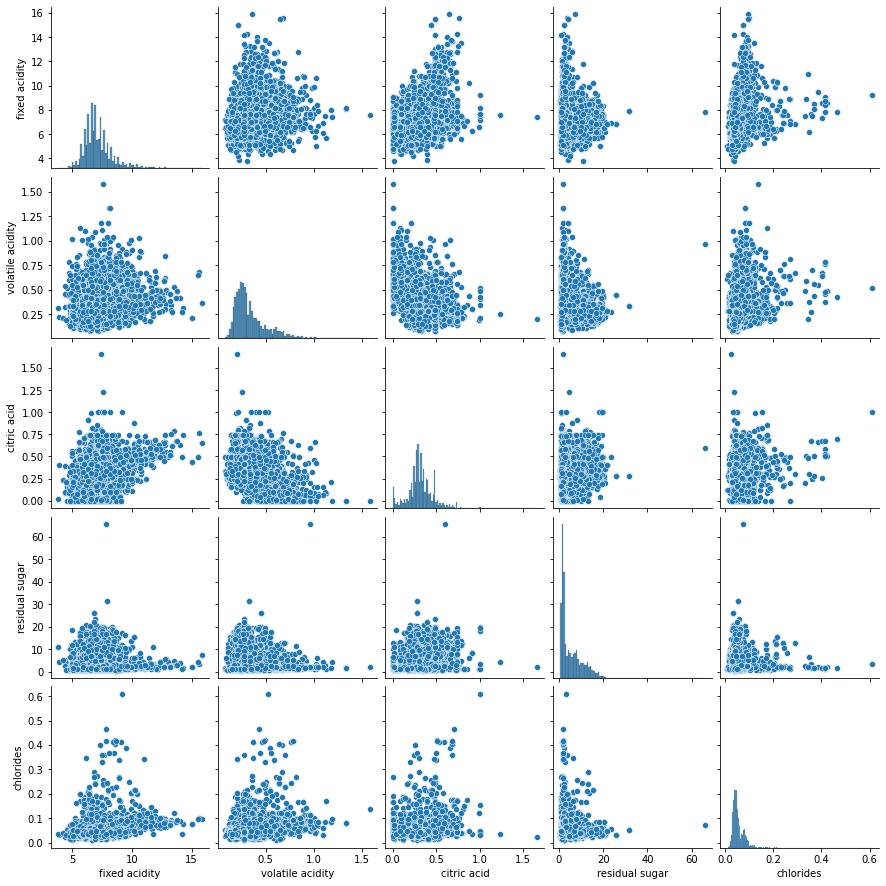

In [3]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요****
import seaborn as sns
data = train.loc[:, 'fixed acidity' : 'chlorides']# loc는 선택

# data의 pairplot을 그려보세요

sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


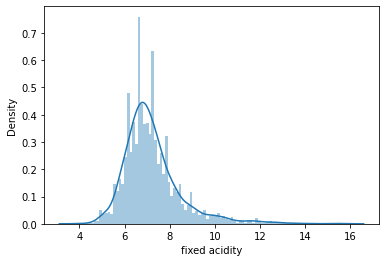

In [4]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train['fixed acidity']

# data의 pairplot을 그려보세요, 하나의 변수, 2개의 변수 의 불포를 그려줌.
# hue Semantic variable that is mapped to determine the color of plot elements

#100개로 잘라서 표현하겠다.
# displot : 데이터의 히스토그램을 그려주는 함수입니다. 
sns.distplot(data,bins = 100)

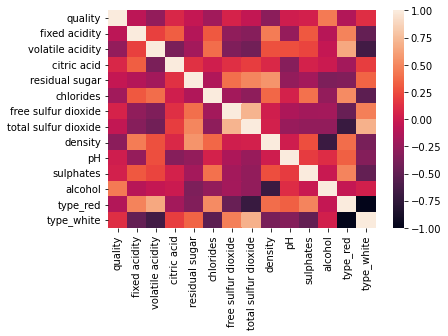

In [5]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )

# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.

data = train.corr()

# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.

sns.heatmap(data)

다중공선선은 상관관계가 높은 독립변수들이 동시에 모델에 포함될 때 발생합니다.

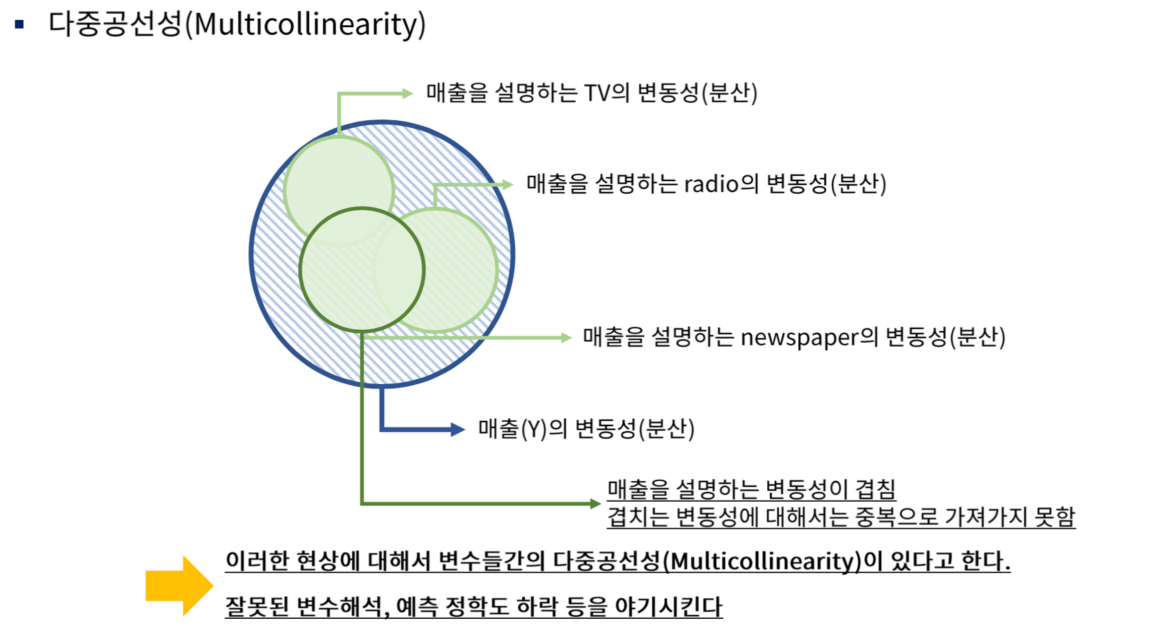

다중공선성 확인
다중공선성을 확인 하는 방법은 크게 3가지가 있습니다. 

Scatter plot을 통한 확인

Heatmap 그래프를 통한 확인

VIF(Variance Inflation Factors, 분산팽창요인)을 통한 확인 

Scatter Plot(산점도 그래프)는 두 개의 연속형 변수에 대한 관계를 파악하는데 유용하게 사용할 수 있습니다. 


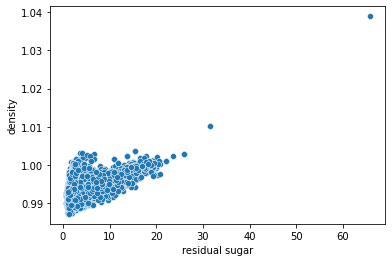

In [6]:
# Scatter Plot을 그릴 변수 지정  >> 상관관계를 그냥 표현한것

x_data = train['residual sugar']
y_data = train['density']

# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.

sns.scatterplot(x = x_data, y = y_data )

VIF(Variance Inflation Factors, 분산팽창요인)

VIF는 변수간의 다중공선성을 진단하는 수치이며 범위 1부터 무한대입니다.

통계학에서는 VIF 값이 10이상이면 해당 변수가 다중공선성이 잇는 것으로 판단 합니다. 

VIF를 구하는 수식은 VIFk = 1 / (1 - Rj2) 입니다.

여기서 VIFk 는 k번째 변수의 VIF 값을 의미하고, Rj2 는 회귀분석에서 사용하는 결정계수 입니다

사이킷 런에서 제공하는 minmaxscaler

(나-최소값)/(최대값-최소값)= std
대략적인 나의 크기

다중공선성 해결
안녕하세요. 이전 시간에 다중공선성을 해결하는 3가지 방법에 대하여 알려드렸고, 그 중 첫번째 방법인 변수 정규화에 대해 실습해 보았습니다.

 이번 시간에는 두번째 방법인 VIF 기준 10이상의 변수들을 제거해 보도록 하겠습니다.

In [27]:
# train 데이터의 VIF 계수 출력

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
#  variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정  
vif["features"] = train.columns 
print(vif)

# MinMaxScaler를 통해 변수 변환 
scaler = MinMaxScaler()
scaler.fit(train) # fit 함수를 이용해  scaler 학습
train_scale = scaler.transform(train)# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.

# Sclaer 를 통해 변환된 데이터의 VIF 확인
new_train_df =  pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns 
vif


      VIF Factor              features
0   1.416009e+00               quality
1   4.858636e+00         fixed acidity
2   2.276390e+00      volatile acidity
3   1.607028e+00           citric acid
4   9.558838e+00        residual sugar
5   1.679595e+00             chlorides
6   2.217950e+00   free sulfur dioxide
7   4.046127e+00  total sulfur dioxide
8   2.179091e+01               density
9   2.504494e+00                    pH
10  1.577450e+00             sulphates
11  5.591433e+00               alcohol
12  5.681913e+05              type_red
13  1.758286e+06            type_white


,VIF Factor,features
0,1.416009,quality
1,4.858636,fixed acidity
2,2.276390,volatile acidity
3,1.607028,citric acid
4,9.558838,residual sugar
5,1.679595,chlorides
6,2.217950,free sulfur dioxide
7,4.046127,total sulfur dioxide
8,21.790905,density
9,2.504494,pH


2번째 방법

In [32]:
# new_train2 = train.drop(['type_white','quality','alcohol','fixed acidity','total sulfur dioxide','density','pH','sulphates'],axis=1)

# # VIF 10이상의 변수 제거 후 VIF 다시 확인
# new_train_df =  pd.DataFrame(new_train2)
# new_train_df.columns = new_train2.columns

# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]

# vif["features"] = new_train_df.columns 

# vif


3번째 방법 

PCA(주성분 분석)

이 경우 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해서 표현할 수 있습니다. 

또한 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 향상 시킬 수 있습니다.  



일반적으로 차원 축소는feature selection 과 feature extraction으로 나눌 수 잇습니다.  

feature selection 은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다.

feature extraction은 기존 피처를 저 차원의 중요 피처로 압축해서 추출하는 것이다.

새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.



다중공선성을 해결하는 방법 중 하나 인 PCA의 경우 feature extraction의 기법 중 하나 입니다. 




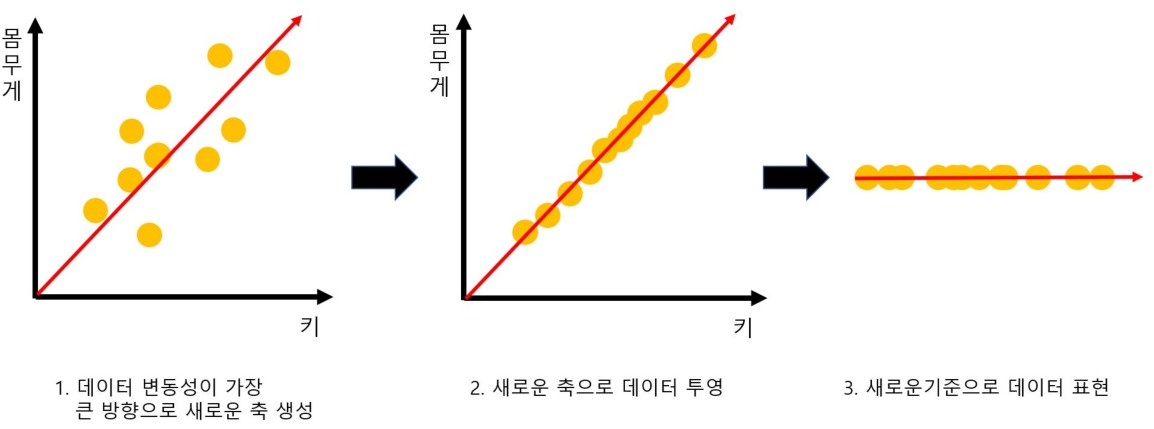

이 2개의 피처를 한개의 주성분을 가진 데이터 셋으로 차원축소하는 과정은 다음과 같습니다.





In [34]:
from sklearn.datasets import load_iris
import pandas as pd 

# 사이킷런 내장 데이터 셋 API 호출

iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns =  ['sepal_length','sepal_width','petal_length','petal_width']
df['target']=iris.target
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [35]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 정규화 라이브러리 호출
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

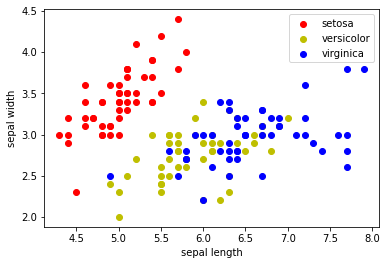

(150, 2)


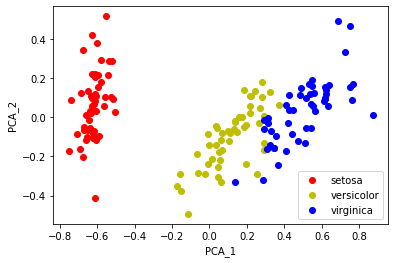

In [36]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
    x_axis_data = df[df['target']==i]['sepal_length']
    y_axis_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data,color = c,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환
# 'sepal_length','sepal_width','petal_length','petal_width'
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_features)

# PCA를 이용하여 4차원 변수를 2차원으로 변환

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환
pca.fit(df_scaler)
df_pca = pca.transform(df_scaler)
print(df_pca.shape)

# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정

df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PCA_1','PCA_2']
df_pca['target']=df.target
df_pca.head(3)

#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
    x_axis_data = df_pca[df_pca['target']==i]['PCA_1']
    y_axis_data = df_pca[df_pca['target']==i]['PCA_2']
    plt.scatter(x_axis_data, y_axis_data, color = c,label=iris.target_names[i])
plt.legend()
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

머신러닝 모델링을 하다 보면 제한된 변수로 성능을 끌어 올리는 데는 한계가 있습니다.  



실제 데이콘 대회 우승자 코드를 살펴보면,  전처리와 모델링은 크게 차이가 없습니다.

우승자들과 그 외 사람들을 비교해보면, 크게 다음 두 가지에서 큰 차이를 보입니다.



1.어떻게 데이터를 증강시켰는지? 

2.어떤 파생 변수를 추가하였는지 ?


연속형 변수를 범주형 변수로 변환 시키는 방법 중 1번째 방법에 대해 알아보겠습니다.



In [ ]:
# train 데이터의 pH 변수를 구간이 4개인 범주형 변수로 변환
# pH < 1  -> lowest
# 1<= pH < 2 -> low
# 2 <= pH < 3-> normal
# 3 <= pH -> high
 
# def func(x):
#     if x < 3:
#         return 'lowest'
#     elif x < 3.3:
#         return 'low'
#     elif x < 3.5:
#         return 'normal'
#     else :
#         return'high' 
# train['pH'] = train['pH'].apply(lambda x : func(x))

연속형 변수를 범주형 변수로 변환 시키는 방법 중 2번째 방법에 대해 알아보겠습니다.



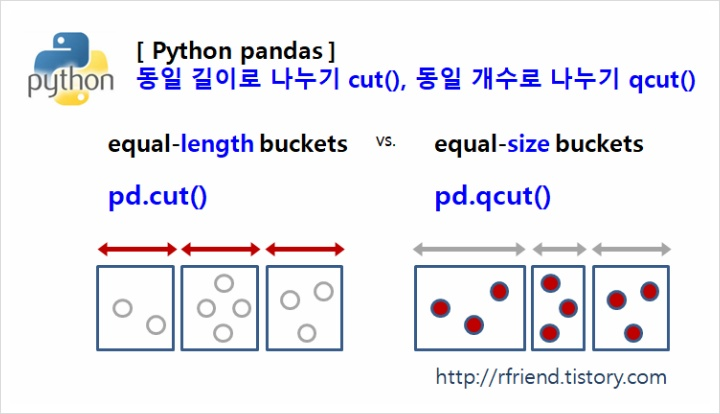

In [37]:
 # train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환

 train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)

데이터에 x1,x2 변수가 있다 하면 PolynomialFeatures 라이브러리를 이용해 

1, x1, x2, x1^2, x1*x2, x2^2 로 간단하게 변환 시킬 수 있습니다.

In [38]:
 # train 데이터를 PolynomialFeatures 를 이용하여 변환

 poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정

# 와인 품질 기준인 quality 변수를 제외한 나머지 변수를 포함한 데이터 변환.
df = train.drop('quality',axis = 1)
df_poly = poly_features.fit_transform(df) # fit_transform 메소드를 통해 데이터 변환
df_poly = pd.DataFrame(df_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환

# DecisionTreeClassifier 모델을 변환된 train 데이터로 학습
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(df_poly,train['quality'])

# test 데이터 변환
poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정

test_poly = poly_features.fit_transform(test) # fit_transform 메소드를 통해 데이터 변환
test_poly = pd.DataFrame(test_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환

# 결괏값 추론
pred = model.predict(test_poly)

# 정답 파일 생성
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.to_csv('poly.csv',index = False)

In [ ]:
from google.colab import files
files.download('poly.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost란 ❓❔
XGBoost는 Extreme Gradient Boosting의 약자입니다. 

Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적

이 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.

Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘 입니다.



여기서 Boosting이 란 무엇이냐면,

여러개의 성능이 높지 않은 모델을 조합해서 사용하는 앙상블 기법중 하나입니다.

성능이 낮은 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모형을 만듭니다. 아래 그림은 boosting 모델의 학습 예시 입니다.
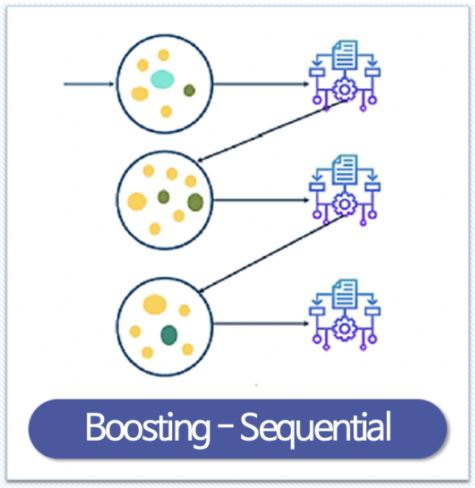

XGBoost의 장점
기존 boosting 모델 대비 빠른 수행시간(병렬 처리)

과적합 규제 지원(Regularization)

분류와 회귀 task 에서 높은 예측 성능

Early Stopping(조기 종료) 기능 제공.

다양한 옵션을 제공해 Customizing이 용이.

결측치를 내부적으로 처리 함.

In [39]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,1,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,1,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,2,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,2,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,2,0,1


In [40]:
train_one = pd.get_dummies(train)

test_one = pd.get_dummies(test)

In [41]:
model = XGBClassifier()

In [42]:
X = train_one.drop('quality',axis= 1)

y = train_one['quality']



# fit 메소드를 이용해 모델 학습

model.fit(X,y)



# predict 메소드와 test_one 데이터를 이용해 품질 예측

pred = model.predict(test_one)



# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기

submission = pd.read_csv('data/sample_submission.csv')

submission['quality'] = pred

submission.head()



# 정답파일 내보내기

submission.to_csv('xgb_pred.csv',index = False)

In [43]:
files.download('xgb_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

안녕하세요 🙋‍♂️🙋‍♀️ 오늘 알아볼 개념은 LightGBM 입니다. 

머신러닝에서 부스팅 알고리즘은 오답에 가중치를 더하면서 학습을 진행하는 알고리즘 입니다. 

그 중 Gradinet Boosting Machine(GBM)은 가중치를 경사하강법(gradint boosting)으로 업데이트 했습니다. 

지난 시간에 배운 XGBoost는 GBM의 단점을 보완한 알고리즘 입니다.  

xgboost는 굉장히 좋은 성능을 보여주었지만 여전히 속도면에서는 조금 느리다는 단점이 존재 합니다. 👴

이러한 단점을 보완해주기위해 탄생한 것이 LightGBM(LGBM) 입니다 ! ✨✨

LGBM은 기존의 gradinet boosting 알고리즘과 다르게 동작됩니다.

기존 boosting 모델들은 트리를 level-wise 하게 늘어나는 방법을 사용한 반면, LGBM은 leaf wise(리프 중심) 트리 분할을 사용 합니다. 

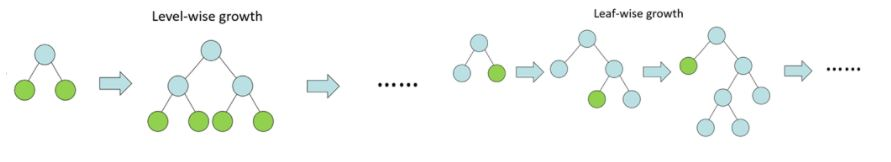

eaf-wise 의 장점은 속도가 빠르다는 것이 가장 큰 장점입니다. 데이터 양이 많아지는 상황에서 빠른 결과를 얻는데 시간이 점점 많이 걸리고 있는데, Light GBM은 큰 사이즈의 데이터를 다룰 수 있고 실행시킬 때 적은 메모리를 차지합니다. 





LGBM의 장점👩‍🏫

대용량 데이터 처리

효율적인 메모리 사용

빠른 속도

GPU 지원



LGBM의 단점👩‍🌾
Light GBM은 Leaf-wise growh로 과적합의 우려가 다른 Tree 알고리즘 대비 높은 편입니다. 그러므로 데이터의 양이 적을 경우 Overfiitng(과적합)에 취약한 면이 있어 데이터 양의 적을 경우 사용을 자제하는 것이 좋습니다. 

In [47]:
# 데이터 확인

train.head()



,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,1,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,1,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,2,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,2,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,2,0,1


In [46]:

# 원핫 인코딩 (pd.get_dummies())

train_one = pd.get_dummies(train)

test_one = pd.get_dummies(test)



# 모델 정의

model = LGBMClassifier()



# 모델 학습



# X 는 train에서 quality 를 제외한 모든 변수

# y 는 train의 qulity 변수



X = train_one.drop('quality',axis= 1)

y = train_one['quality']



# fit 메소드를 이용해 모델 학습

model.fit(X,y)



# predict 메소드와 test_one 데이터를 이용해 품질 예측

pred = model.predict(test_one)



# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기

submission = pd.read_csv('data/sample_submission.csv')

submission['quality'] = pred

submission.head()



# 정답파일 내보내기

submission.to_csv('lgbm_pred.csv',index = False)

In [48]:
files.download('lgbm_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Voting Classifier란 여러개의 모델을 결합하여 더 좋은 예측 결과를 도출 하는 앙상블 기법 중 하나 입니다.

Voting Classifier에는 hard voting 방법과 soft voting 방법이 있습니다 .



Hard Voting
Hard Voting은 Majority Voting이라고도 하며, 각각의 모델들이 결과를 예측하면 각 모델의 예측을 모아 다수결 투표로 최종 예측 결과를 선정하는 방식입니다.

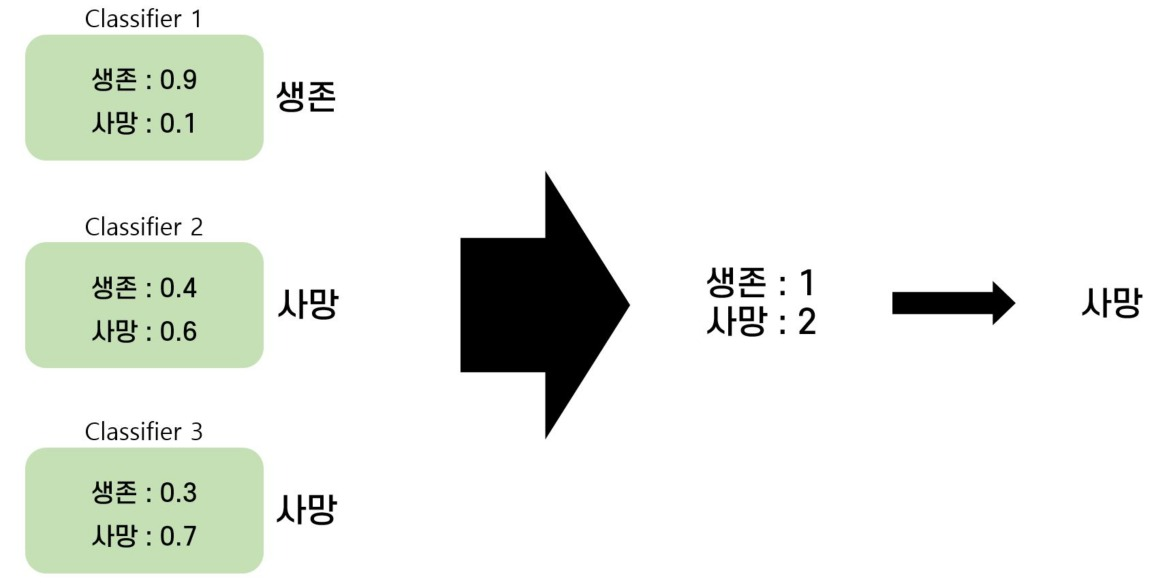

그림을 살펴보시면, 첫 번째 분류기는 0.9의 확률로 생존을 선택, 두 번째 분류기는 0.6의 확률로 사망을 선택, 세 번째 분류기는 0.7의 확률로 사망을 선택 하였습니다. 생존을 선택 한 모델이 1개, 사망을 선택한 모델이 2개 이기 때문에 Voting Classifier은 최종적으로 사망을 선택하게 됩니다.



Soft Voting
Soft Voting은 Probability Voting이라고 하며, 각 모델들이 예측한 결과값의 확률을 합산해 최종 예측 결과를 선정합니다.

단순히 개별 분류기의 예측 결과만을 고려하지 않고 높은 확률값을 반환하는 모델의 비중을 고려할 수 있기 때문에 Hard Voting 보다 성능이 더 좋은 편입니다.

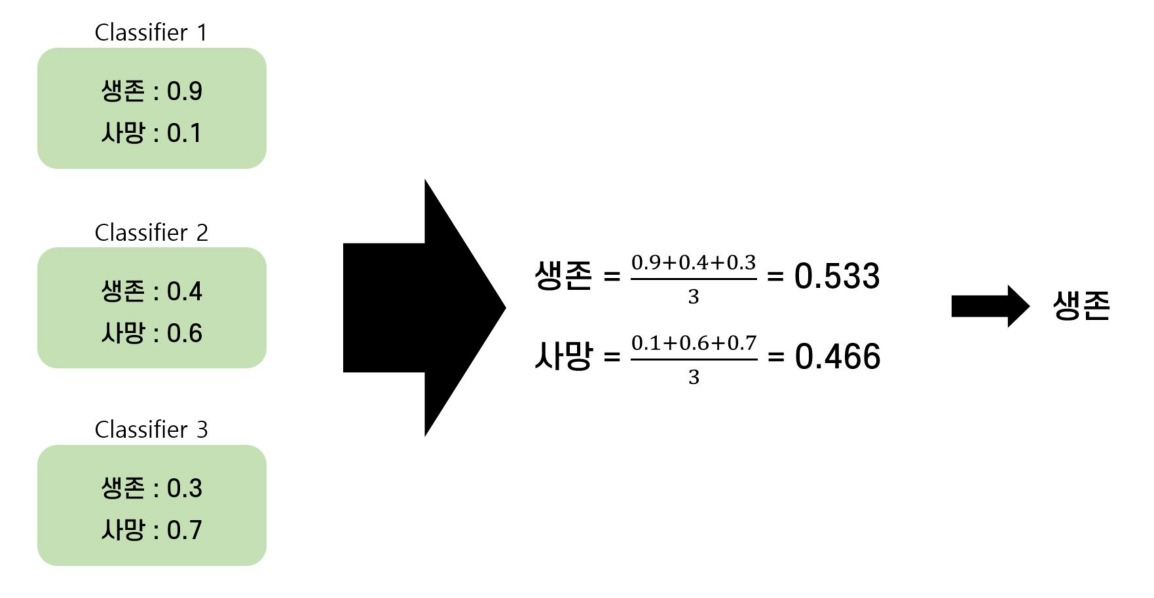

그림을 살펴보시면, 3개의 모델이 생존을 선택 할 확률의 평균은 0.533 이고, 사망을 선택 할 확률의 평균은 0.466 입니다. 최종적으로 Voting Classifier는 Hard Voting과 다르게 생존을 선택하게 됩니다.

In [49]:
# 데이터 확인
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,1,0,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,1,1,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,2,0,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,2,0,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,2,0,1


In [50]:
# 원핫 인코딩 (pd.get_dummies())

train_one = pd.get_dummies(train)
test_one = pd.get_dummies(test)

# 모델 정의
LGBM = LGBMClassifier()
XGB = XGBClassifier()
RF = RandomForestClassifier()

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

In [51]:
# 모델 학습

# X 는 train에서 quality 를 제외한 모든 변수
# y 는 train의 qulity 변수

X = train_one.drop('quality',axis= 1)
y = train_one['quality']

# fit 메소드를 이용해 모델 학습
VC.fit(X,y)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb', XGBClassifier()),
                             ('lgbm', LGBMClassifier())],
                 voting='soft')

In [52]:
# predict 메소드와 test_one 데이터를 이용해 품질 예측
pred = VC.predict(test_one)

In [53]:
# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.head()

# 정답파일 내보내기
submission.to_csv('VC_pred.csv',index = False)

In [54]:
files.download('VC_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

안녕하세요.🧏‍♂️🧏‍♀️ Lv4 의 튜닝 부분에서는 Randomforest, XGBoost, Light GBM 총 3개의 모델을 튜닝하고 Voting Classifier로 만드는 과정을 진행 할 예정입니다. 

모델을 튜닝 하기전에 우선 Lv3에서 진행했던 Bayesian Optimization에 대해 복습하는 시간을 갖도록 하겠습니다. 



#Bayesian Optimization 🎸


우리가 흔히 알고 있는 하이퍼 파라미터 튜닝방법은 Grid Search, Random Search 입니다. 

Grid Search란 가능한 하이퍼파라미터 경우의 수를 일정 구간으로 나눠 구간별로 균일하게 대입 해보는 방식입니다.

간격을 어떻게 잡을지 정하는 것이 문제고, 시간이 너무 오래걸린다는 단점이 있습니다.

Random Search란 가능한 하이퍼파라미터 조합을 random하게 선택해서 대입해보는 방식입니다. 

위 두가지 튜닝방법의 문제점은 이제까지의 사전지식(실험결과) 가 반영되지 않는 다는 것 입니다. 



Baysian Optimization은 사전지식(실험 결과)을 반영해가며 하이퍼파라미터를 탐색 합니다. 즉, 현재까지 얻어진 모델의 파라미터와 추가적인 실험 정보를 통해 데이터가 주어 졌을 때 모델의 성능이 가장 좋을 확률이 높은 파라미터를 찾아냅니다.



우리가 다룰 Bayesian Optimization 패키지에서는 다음과 같은 단계가 필요합니다.👨‍🏫

1변경할 하이퍼 파라미터의 범위를 설정한다.

2Bayesian Optimization 패키지를 통해, 하이퍼 파라미터의 범위 속 값들을 랜덤하게 가져온다.

3처음 R번은 정말 Random하게 좌표를 꺼내 성능을 확인한다.

4이후 B번은 Bayesian Optimization을 통해 B번만큼 최적의 값을 찾는다. 


In [55]:
# 데이터를 불러와 학습시킬 준비하기

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.429752,0.0,1.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0.785124,1.0,0.0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.223140,0.0,1.0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.280992,0.0,1.0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.247934,0.0,1.0


In [56]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=29996c8a448e34c3cdad2be997d44f06d0522d4a934357e8b723cbfc433dd607
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [57]:
# Bayesian Optimization 불러오기
from bayes_opt import BayesianOptimization

In [58]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):

  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),      
              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요

BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_rf.maximize(init_points = 5, n_iter = 5)


|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5173   |  2.098    |  80.06    |
|  2        |  0.5264   |  2.206    |  68.14    |
|  3        |  0.5236   |  1.847    |  75.21    |
|  4        |  0.5364   |  1.875    |  92.42    |
|  5        |  0.5309   |  2.927    |  56.84    |
|  6        |  0.5273   |  1.863    |  96.54    |
|  7        |  0.44     |  1.005    |  89.83    |
|  8        |  0.5436   |  2.663    |  74.79    |
|  9        |  0.5345   |  2.996    |  73.53    |
|  10       |  0.5455   |  2.511    |  94.08    |


In [59]:
# 하이퍼파라미터의 결과값을 불러와 "max_params"라는 변수에 저장해보세요
max_params = BO_rf.max['params']

max_params['max_depth'] = int(max_params['max_depth'])
max_params['n_estimators'] = int(max_params['n_estimators'])
print(max_params)

# Bayesian Optimization의 결과를 "BO_tuend_rf"라는 변수에 저장해보세요
BO_tuend_rf = RandomForestClassifier(**max_params)

{'max_depth': 2, 'n_estimators': 94}


 Bayesian Optimization 을 이용해 XGBoost 모델을 튜닝 해보도록 하겠습니다.

튜닝에 앞서 XGBoost의 하이퍼 파라미터를 알아 보겠습니다.

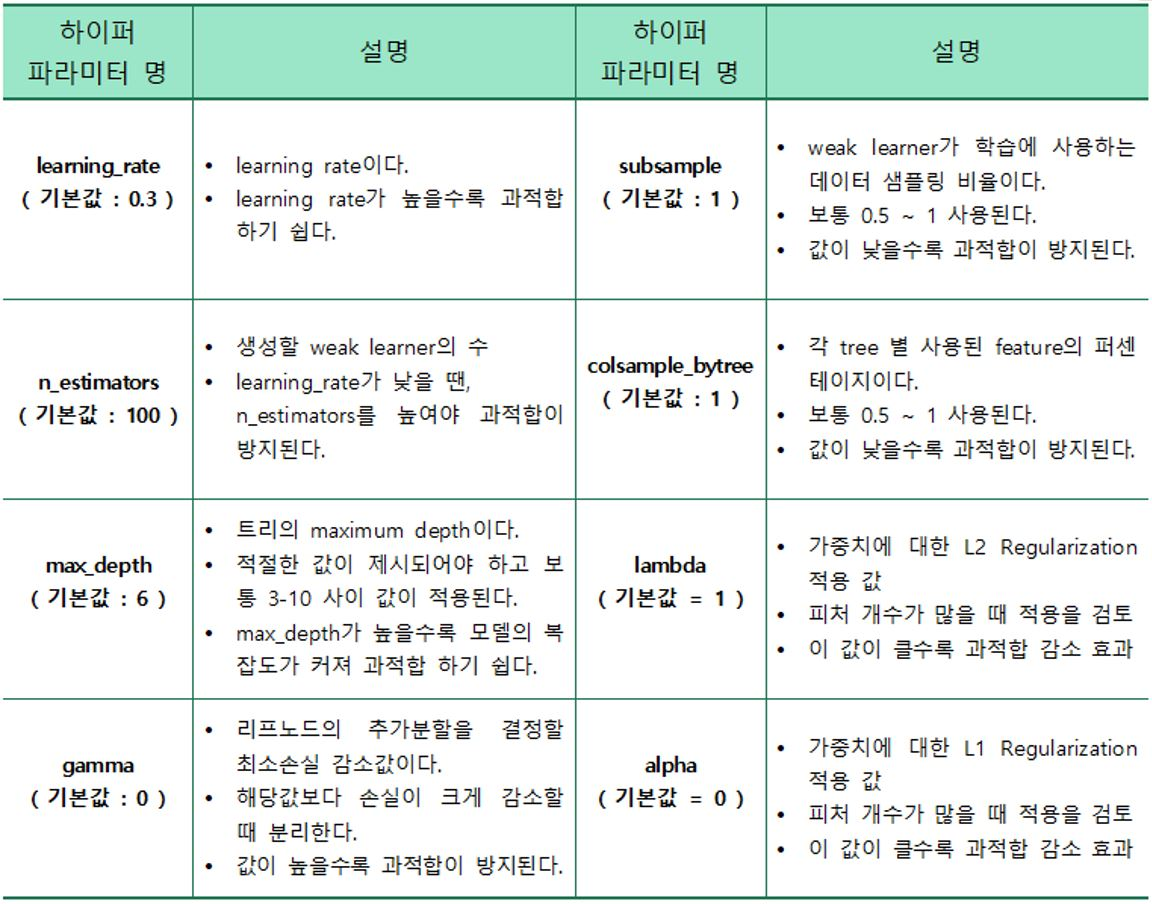

In [60]:
# 라이브러리 및 데이터 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 데이터를 불러와 학습시킬 준비하기

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.429752,0.0,1.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0.785124,1.0,0.0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.223140,0.0,1.0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.280992,0.0,1.0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.247934,0.0,1.0


In [64]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# XGBoost의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 XGBoost hyperparameter이름이고, value는 탐색할 범위 입니다.

xgb_parameter_bounds = {
                      'gamma' : (0,10),
                      'max_depth' : (1,3), 
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def xgb_bo(gamma,max_depth, subsample):

  xgb_params = {
              'gamma' : int(round(gamma)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

  xgb = XGBClassifier(**xgb_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  xgb.fit(X_train,y_train)
  score = accuracy_score(y_valid, xgb.predict(X_valid))
  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_xgb.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   |   gamma   | max_depth | subsample |
-------------------------------------------------------------
|  1        |  0.56     |  5.488    |  2.43     |  0.8014   |
|  2        |  0.5464   |  5.449    |  1.847    |  0.8229   |
|  3        |  0.5636   |  4.376    |  2.784    |  0.9818   |
|  4        |  0.5291   |  3.834    |  2.583    |  0.7644   |
|  5        |  0.5618   |  5.68     |  2.851    |  0.5355   |
|  6        |  0.5891   |  4.415    |  2.747    |  0.8591   |
|  7        |  0.5264   |  5.689    |  2.822    |  0.5601   |
|  8        |  0.5255   |  5.411    |  2.106    |  0.8663   |
|  9        |  0.5591   |  1.953    |  1.551    |  0.5432   |
|  10       |  0.5355   |  3.72     |  1.231    |  0.9286   |


In [65]:
# 튜닝된 파라미터를 바탕으로 test 데이터 셋 예측

#학습
xgb_tune =XGBClassifier(gamma = 4.376,max_depth = 3, subsample = 0.9818)
xgb_tune.fit(X,y)


#예측
pred = xgb_tune.predict(test.drop(columns = ['index'] ))

#정답파일 내보내기
sub = pd.read_csv('data/sample_submission.csv')
sub['quality'] = pred
sub.to_csv('tune_xgb.csv',index = False)

In [66]:
files.download('tune_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

이번 시간에는 Bayesian Optimization 을 이용해 Light GBM모델을 튜닝 해보도록 하겠습니다.

튜닝에 앞서 Light GBM의 하이퍼 파라미터를 알아 보겠습니다.



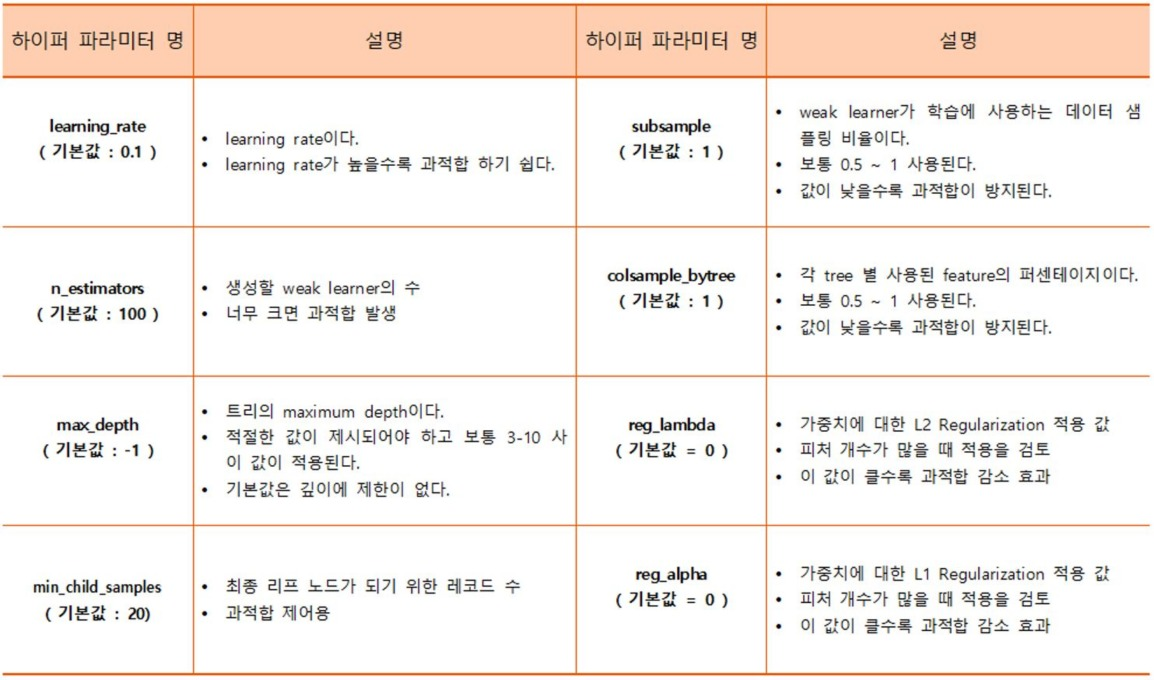

Light GBM 파라미터중 주요한 n_estimators, max_depth, subsample 3가지 파라미터를 튜닝 해보도록 하겠습니다.

In [67]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# LGBM의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 LGBM hyperparameter이름이고, value는 탐색할 범위 입니다.

lgbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def lgbm_bo(n_estimators,max_depth, subsample):

  lgbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

  lgbm = LGBMClassifier(**lgbm_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  lgbm.fit(X_train,y_train)

  score = accuracy_score(y_valid, lgbm.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_lgbm"라는 변수에 Bayesian Optmization을 저장해보세요

BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_lgbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... | subsample |
-------------------------------------------------------------
|  1        |  0.5645   |  2.098    |  80.06    |  0.8014   |
|  2        |  0.5264   |  2.09     |  59.66    |  0.8229   |
|  3        |  0.5455   |  1.875    |  92.42    |  0.9818   |
|  4        |  0.5545   |  1.767    |  85.42    |  0.7644   |
|  5        |  0.5655   |  2.136    |  94.79    |  0.5355   |
|  6        |  0.5473   |  2.338    |  79.72    |  0.9232   |
|  7        |  0.5655   |  2.049    |  94.82    |  0.5995   |
|  8        |  0.5564   |  1.72     |  80.54    |  0.5511   |
|  9        |  0.5382   |  2.223    |  94.26    |  0.8798   |
|  10       |  0.5645   |  1.744    |  38.08    |  0.9286   |


In [68]:
# 모델 정의 (튜닝된 파라미터로)
LGBM = LGBMClassifier(max_depth = 2,n_estimators=60, subsample = 0.8229)
XGB = XGBClassifier(gamma =  4.376, max_depth = 3, subsample = 0.9818)
RF = RandomForestClassifier(max_depth = 3, n_estimators = 35)

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

X = train_one.drop('quality',axis= 1)
y = train_one['quality']



# fit 메소드를 이용해 모델 학습

VC.fit(X,y)

# predict 메소드와 test_one 데이터를 이용해 품질 예측

pred = VC.predict(test_one)

# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.head()

submission.to_csv('tune_voting.csv',index=False)

In [69]:
files.download('tune_voting.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>